In [1]:
##Christoffer Spindler ATP Script


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as math

In [3]:
#Importerer figur 1 og figur 8 fra excel. Denne er allerede gemt seperat.
# Vi har vurderet, at figur 1 og figur 8 fra bilag L er tilstrækkeligt data-grundlag til at lave vores underliggende beregninger.
# Hertil supplerer vi med centrale antagelser understøttet af andet empiri, og ydelsesoversigten fra figur 10 i samme bilag.
df_figur1 = pd.read_excel(r'C:\Users\chris\Documents\GitHub\ATP-Case\Figur_1.xlsx')
df_figur8 = pd.read_excel(r'C:\Users\chris\Documents\GitHub\ATP-Case\Figur_8.xlsx')

In [4]:
#Inspicerer data
df_figur1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Figur 1 - Faglærte og ufaglærte har været læng...,NaN,NaN,NaN,NaN,NaN
1,NaN,Gå til forside,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.000 personer,Ufaglært,Faglært,KVU,MVU,LVU
5,NaN,30,1.7,1.4,0.2,0.9,0.6
6,,31,1.7,1.6,0.2,1,0.8
7,NaN,32,1.9,1.8,0.2,1.3,1.1
8,NaN,33,2,1.9,0.3,1.5,1.4
9,NaN,34,2.2,2.2,0.3,2,1.9


In [6]:
#Inspicerer data
df_figur8

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,1.000 personer,Berettiget til tidlig pension
1,NaN,Ufaglært,14.7
2,NaN,Faglært,18.2
3,NaN,KVU,1.9
4,NaN,MVU,2.9
5,NaN,LVU,0.4
6,NaN,"Anm.: Antal er opgjort i helårspersoner, som k...",NaN
7,NaN,Kilde: Egne beregninger på baggrund af Danmark...,NaN


In [7]:
##Rydder op i data##

##Figur1:
#Sletter unødvendig kolonne i figur1
del df_figur1['Unnamed: 0']
#Navngiver kolonner
df_figur1 = df_figur1.rename(columns={'Unnamed: 1': 'År på arbejdsmarkedet', 'Unnamed: 2': 'Ufaglært', 'Unnamed: 3': 'Faglært', 'Unnamed: 4':'KVU', 'Unnamed: 5': 'MVU', 'Unnamed: 6': 'LVU'})
#Sletter unødvendige rækker
df_figur1=df_figur1.drop([0,1,2,3,4,20,21], axis=0)

##Figur8:
del df_figur8['Unnamed: 0']
df_figur8 = df_figur8.rename(columns={'Unnamed: 1': 'Faggruppe', 'Unnamed: 2': 'Berettiget til TP'})
df_figur8=df_figur8.drop([0,6,7], axis=0)

In [8]:
#Inspicerer data igen
df_figur1

,År på arbejdsmarkedet,Ufaglært,Faglært,KVU,MVU,LVU
5,30,1.7,1.4,0.2,0.9,0.6
6,31,1.7,1.6,0.2,1,0.8
7,32,1.9,1.8,0.2,1.3,1.1
8,33,2,1.9,0.3,1.5,1.4
9,34,2.2,2.2,0.3,2,1.9
10,35,2.5,2.7,0.4,2.9,2.6
11,36,3,3.2,0.5,4.1,3.4
12,37,3.5,4,0.7,6,3.8
13,38,4.2,5.5,1.1,8.3,3.3
14,39,5.4,7.6,1.5,9.3,2.3


In [9]:
#Vi omregner  til procent for hver kolonne i figur 1, da vi skal bruge det senere til data
df_figur1_percentcolumns = pd.DataFrame.copy(df_figur1)
cols = ['Ufaglært', 'Faglært', 'KVU', 'MVU', 'LVU']
df_figur1_percentcolumns[cols] = df_figur1_percentcolumns[cols].div(df_figur1_percentcolumns[cols].sum(axis=0), axis=1).multiply(100)

In [10]:
#inspicerer % dataframen
df_figur1_percentcolumns

,År på arbejdsmarkedet,Ufaglært,Faglært,KVU,MVU,LVU
5,30,1.934016,0.9908,1.142857,1.404056,2.390438
6,31,1.934016,1.132343,1.142857,1.560062,3.187251
7,32,2.161547,1.273885,1.142857,2.028081,4.38247
8,33,2.275313,1.344657,1.714286,2.340094,5.577689
9,34,2.502844,1.556971,1.714286,3.120125,7.569721
10,35,2.844141,1.910828,2.285714,4.524181,10.358566
11,36,3.412969,2.264685,2.857143,6.396256,13.545817
12,37,3.981797,2.830856,4.0,9.360374,15.139442
13,38,4.778157,3.892427,6.285714,12.948518,13.14741
14,39,6.143345,5.378627,8.571429,14.50858,9.163347


In [11]:
# Inspicerer data igen
df_figur8

,Faggruppe,Berettiget til TP
1,Ufaglært,14.7
2,Faglært,18.2
3,KVU,1.9
4,MVU,2.9
5,LVU,0.4


In [12]:
#Vi beregner her et estimat hvor mange ansøgninger der vil modtages mhp. anvendelse. Estimatet  bygger på, at det er 59.5% af alle efterlønsberettigede der anvender ydelsen.
df_Calculations = pd.DataFrame.copy(df_figur8)
df_Calculations.insert(2,'Ansøgninger mhp. anvendelse',[14.7*0.595,18.2*0.595,1.9*0.595,2.9*0.595,0.4*0.595])
df_Calculations.insert(3,'Heraf m. +44 Anciennitet',[8.7465*0.16496018,10.2890*0.1507431,1.1305*0.10285714,1.7255*0.01872075,0.2380*0.00796813])
df_Calculations.insert(4,'Ansøgninger mhp. tryghed',[14.7*0.15,18.2*0.15,1.9*0.15,2.9*0.15,0.4*0.15])
df_Calculations.insert(5,'Ansøgninger til behandling',[8.7465-(8.7465*0.16496018)+(14.7*0.15),10.2890-(10.2890*0.1507431)+(18.2*0.15),1.1305-(1.1305*0.10285714)+(1.9*0.15),1.7255-(1.7255*0.01872075)+(2.9*0.15),0.2380-(0.2380*0.00796813)+(0.4*0.15)])

In [13]:
total=df_Calculations.sum()
total.name='Total'
df_Calculations=df_Calculations.append(total.transpose())

In [14]:
df_Calculations

,Faggruppe,Berettiget til TP,Ansøgninger mhp. anvendelse,Heraf m. +44 Anciennitet,Ansøgninger mhp. tryghed,Ansøgninger til behandling
1,Ufaglært,14.7,8.7465,1.442824,2.205,9.508676
2,Faglært,18.2,10.8290,1.550996,2.730,11.468004
3,KVU,1.9,1.1305,0.116280,0.285,1.299220
4,MVU,2.9,1.7255,0.032303,0.435,2.128197
5,LVU,0.4,0.2380,0.001896,0.060,0.296104
Total,UfaglærtFaglærtKVUMVULVU,38.1,22.6695,3.144299,5.715,24.700201


In [15]:
#pba. ovenstående beregner vi den nødvendige sagsbehandlingstid for at afvikle sagspuklen
df_sagsbehandling = pd.DataFrame(data=[['Ufaglært',9509*30,(9509*30)/60],['Faglært',11468*30,(11468*30)/60],['KVU',1299*30,(1299*30)/60],['MVU',2128*30,(2128*30)/60],['LVU',296*30,(296*30)/60],['Total',24700*30,(24700*30)/60]],columns=['Faggruppe', 'Sagsbehandlingstid(min. pr. ann.)', 'Sagsbehandlingstid(t. pr. ann.)'])

In [16]:
df_sagsbehandling

,Faggruppe,Sagsbehandlingstid(min. pr. ann.),Sagsbehandlingstid(t. pr. ann.)
0,Ufaglært,285270,4754.5
1,Faglært,344040,5734.0
2,KVU,38970,649.5
3,MVU,63840,1064.0
4,LVU,8880,148.0
5,Total,741000,12350.0


In [17]:
#nedenfor beregnes den effektive arbejdstid pr. medarbejder
df_arbejdstid = pd.DataFrame(data=[['Arbejdstid',1356],['Heraf effektiv tid',1356*0.6]], columns=['','Timer pr. år'])

In [18]:
df_arbejdstid

,,Timer pr. år
0,Arbejdstid,1356.0
1,Heraf effektiv tid,813.6


In [60]:
#herefter udregnes mængden af sagsbehandlere pr. ansøgningsgruppe
df_arbejdsstyrke = pd.DataFrame(data=[['Ufaglært',((9509*30)/60)/813.6,(((9509*30)/60)/813.6)/5*12],['Faglært',((11468*30)/60)/813.3,(((11468*30)/60)/813.3)/5*12],['KVU',((1299*30)/60)/813.6,(((1299*30)/60)/813.6)/5*12],['MVU',((2128*30)/60)/813.6,(((2128*30)/60)/813.6)/5*12],['LVU',((296*30)/60)/813.6,(((296*30)/60)/813.6)/5*12],['Total',((24700*30)/60)/813.6,(((24700*30)/60)/813.6)/5*12]], columns=['','Årsværk sagsbehandling','Bemandingsbehov 2021'])

In [61]:
df_arbejdsstyrke

,,Årsværk sagsbehandling,Bemandingsbehov 2021
0,Ufaglært,5.843781,14.025074
1,Faglært,7.050289,16.920693
2,KVU,0.798304,1.915929
3,MVU,1.307768,3.138643
4,LVU,0.181908,0.436578
5,Total,15.179449,36.430678


In [62]:
# for at opnå en hensigtsmæssig arbejdsgang opdeler vi ansøgningsgrupperne så de falder i 2 enheder og beregner behovet for sagsbehandlere. 
df_arbejdsstyrke_funktionel = pd.DataFrame(data=[['1. Enhed','Ufaglært, KVU, MVU & LVU',(((9509*30)/60)/813.6)/5*12+(((1299*30)/60)/813.6)/5*12+(((2128*30)/60)/813.6)/5*12+(((296*30)/60)/813.6)/5*12],['2. Enhed','Faglært',(((11468*30)/60)/813.3)/5*12],['Total','',(((24700*30)/60)/813.6)/5*12]], columns=['','Faggruppe','Bemandning 2021'])

In [63]:
df_arbejdsstyrke_funktionel

,,Faggruppe,Bemandning 2021
0,1. Enhed,"Ufaglært, KVU, MVU & LVU",19.516224
1,2. Enhed,Faglært,16.920693
2,Total,,36.430678


In [66]:
pip install waterfall-ax

Note: you may need to restart the kernel to use updated packages.


In [65]:
from waterfall_ax import WaterfallChart
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (<ipython-input-65-e373fb00db28>, line 1)

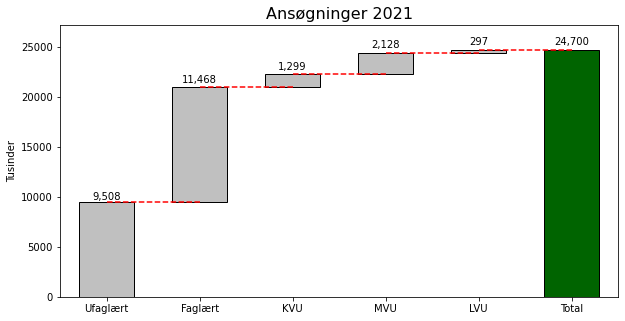

In [59]:
#Herefter formaterer vi vores første waterfall chart
step_values = [9508, 20976, 22275, 24403, 24700]
metric_name = 'Tusinder'
step_names = ['Ufaglært','Faglært','KVU','MVU','LVU']
last_step_label = 'Total'
bar_kwargs = {'edgecolor': 'black'}
line_kwargs = {'color': 'red'}

waterfall1 = WaterfallChart(
    step_values, 
    step_names=step_names, 
    metric_name=metric_name, 
    last_step_label=last_step_label
)

wf_ax = waterfall1.plot_waterfall(
    title='Ansøgninger 2021',
    bar_kwargs = bar_kwargs,
    line_kwargs = line_kwargs,
    color_kwargs = {
    'c_bar_start': 'silver',
    'c_bar_end': 'darkgreen',
    'c_bar_pos': 'silver',
    'c_text_start': 'black',
    'c_text_pos': 'black'
    }
        
)
plt.show()

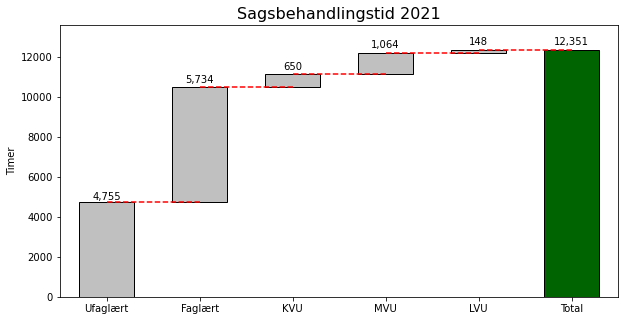

In [64]:
#Vi laver waterfallchart nr. 2 til sagsbehandlingstiden i timer 2021
step_values2 = [4755, 10489, 11139, 12203, 12351]
metric_name2 = 'Timer'
waterfall2 = WaterfallChart(
    step_values2, 
    step_names=step_names, 
    metric_name=metric_name2, 
    last_step_label=last_step_label
)

wf_ax = waterfall2.plot_waterfall(
    title='Sagsbehandlingstid 2021',
    bar_kwargs = bar_kwargs,
    line_kwargs = line_kwargs,
    color_kwargs = {
    'c_bar_start': 'silver',
    'c_bar_end': 'darkgreen',
    'c_bar_pos': 'silver',
    'c_text_start': 'black',
    'c_text_pos': 'black'
    }
        
)
plt.show()